
# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [259]:
# set up import statements for all of the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [260]:
# Load data. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
df = pd.read_csv('/Users/seattlehibiscus/Desktop/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [262]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [274]:
df[df.budget <=100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5720 entries, 30 to 10864
Data columns (total 8 columns):
id              5720 non-null int64
popularity      5720 non-null float64
budget          5720 non-null int64
revenue         5720 non-null int64
genres          5720 non-null object
vote_count      5720 non-null int64
vote_average    5720 non-null float64
release_year    5720 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 402.2+ KB


In [277]:
df[df.revenue <=100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6031 entries, 48 to 10865
Data columns (total 8 columns):
id              6031 non-null int64
popularity      6031 non-null float64
budget          6031 non-null int64
revenue         6031 non-null int64
genres          6031 non-null object
vote_count      6031 non-null int64
vote_average    6031 non-null float64
release_year    6031 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 424.1+ KB


In [278]:
sum(df.duplicated())

1

In [279]:
df[df.duplicated() == True]

,id,popularity,budget,revenue,genres,vote_count,vote_average,release_year
2090,42194,0.59643,30000000,967000,Crime|Drama|Action|Thriller|Science Fiction,110,5.0,2010


> **Problem1**: There are irrelevant columns and missing data.

> **Problem2**: There are values of '0' and values below '100' in columns of 'budget' and 'revenue', which is not reasonable. However, rows with those values are almost half of all the data. Therefore, this data cleaning will be performed before analyzing the second question(What kinds of properties are associated with movies that have high revenues?)

> **Problem3**: There is one duplicated row.


### Preliminary Data Cleaning (drop irrelevant columns, NA and duplicated row)

In [265]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [266]:
df.drop(columns=['imdb_id',  'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'production_companies', 'release_date',
        'budget_adj',
       'revenue_adj'], inplace=True)

In [268]:
df.dropna(inplace=True)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 8 columns):
id              10843 non-null int64
popularity      10843 non-null float64
budget          10843 non-null int64
revenue         10843 non-null int64
genres          10843 non-null object
vote_count      10843 non-null int64
vote_average    10843 non-null float64
release_year    10843 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 762.4+ KB


> **Note**: drop irrelvant columns for questions and missing data of rows regarding 'genres'.

In [284]:
df.drop_duplicates(inplace=True)

In [285]:
df.duplicated().sum()

0

> **Note**: remove duplicated row.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which genres are most popular from year to year?)

In [287]:
popularity_mean = df.groupby('genres').popularity.mean()
mean.sort_values(ascending=False)[0:4]

genres
Adventure|Science Fiction|Thriller                   13.112507
Adventure|Drama|Science Fiction                      12.699699
Science Fiction|Adventure|Thriller                   10.739009
Action|Thriller|Science Fiction|Mystery|Adventure     9.363643
Name: popularity, dtype: float64

>**Note**: get the four most popular genres by means of counting each genre's average popularity.

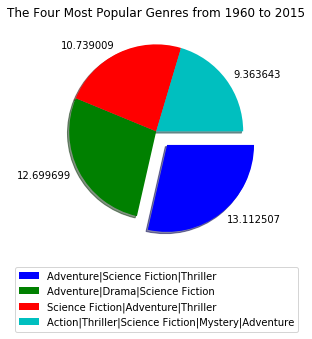

In [288]:
values = list(mean.sort_values(ascending=False)[0:4])
colors = ['b', 'g', 'r', 'c']
labels = list(mean.sort_values(ascending=False)[0:4].index)
explode = (0.2, 0, 0, 0)
plt.pie(values, colors=colors, labels= values,explode=explode,counterclock=False, shadow=True)
plt.title('The Four Most Popular Genres from 1960 to 2015')
plt.legend(labels,loc=9,bbox_to_anchor=(0.5, -0.1))
plt.show()

Text(0, -7, 'NO.1: Adventure|Science Fiction|Thriller\nNO.2: Adventure|Drama|Science Fiction\nNO.3: Science Fiction|Adventure|Thriller\nNO.4: Action|Thriller|Science Fiction|Mystery|Adventure')

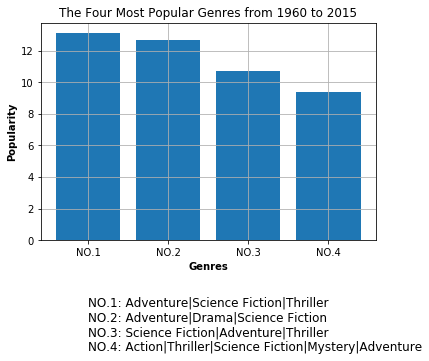

In [289]:
popularity = list(mean.sort_values(ascending=False)[0:4])
plt.bar(('NO.1','NO.2','NO.3','NO.4'), popularity)
plt.title('The Four Most Popular Genres from 1960 to 2015')
plt.xlabel('Genres', weight='bold')
plt.ylabel('Popularity', weight='bold')
plt.grid(True)
plt.text(0, -7, 'NO.1: Adventure|Science Fiction|Thriller\nNO.2: Adventure|Drama|Science Fiction\nNO.3: Science Fiction|Adventure|Thriller\nNO.4: Action|Thriller|Science Fiction|Mystery|Adventure', fontsize=12)

> **Note**: display the four most popular genres by both pie chart and bar chart.

### Research Question 2  ( What kinds of properties are associated with movies that have high revenues?)

#### Step1: final data cleaning for 'budget' and 'revenue'.

In [327]:
df1 = df[df.budget>100]
df2 = df[df.revenue>100]
df1 = df1.merge(df2, how='inner')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3823 entries, 0 to 3822
Data columns (total 8 columns):
id              3823 non-null int64
popularity      3823 non-null float64
budget          3823 non-null int64
revenue         3823 non-null int64
genres          3823 non-null object
vote_count      3823 non-null int64
vote_average    3823 non-null float64
release_year    3823 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 268.8+ KB


> **Note**: get the dataframe with both 'budget' and 'revenue' not having values under 100

#### Step2: analyze the relationship between each property ('popularity', 'budget', 'vote_count', 'vote_average' and 'release_year') with revenue.

In [351]:
df1['popularity'].corr(df1['revenue'])

0.6146780247970434

Text(0.5, 1.0, 'Relation between Revenue and Popularity')

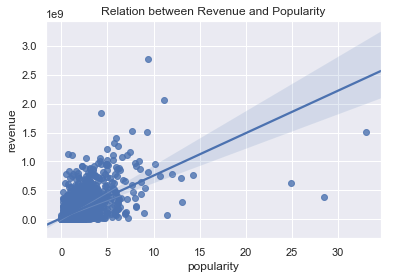

In [350]:
x = df1['popularity']
y = df1['revenue']
sns.set(color_codes=True)
sns.regplot(x,y).set_title('Relation between Revenue and Popularity')

>**Note**: A moderate uphill (positive) relationship between revenue and popularity.

In [352]:
df1['budget'].corr(df1['revenue'])

0.6875222350325935

Text(0.5, 1.0, 'Relation between Revenue and Budget')

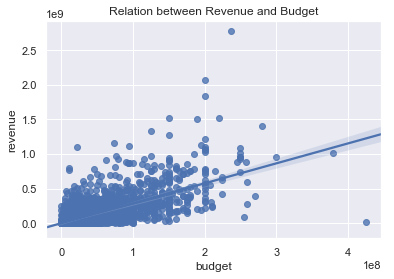

In [353]:
x = df1['budget']
y = df1['revenue']
sns.set(color_codes=True)
sns.regplot(x,y).set_title('Relation between Revenue and Budget')

>**Note**: A moderate uphill (positive) relationship between revenue and budget.

In [354]:
df1['vote_count'].corr(df1['revenue'])

0.754040130441291

Text(0.5, 1.0, 'Relation between Revenue and Vote_count')

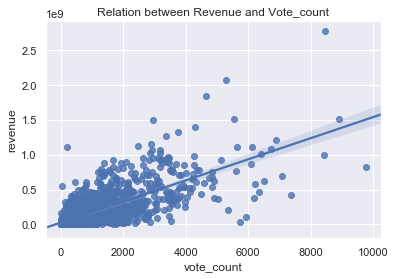

In [355]:
x = df1['vote_count']
y = df1['revenue']
sns.set(color_codes=True)
sns.regplot(x,y).set_title('Relation between Revenue and Vote_count')

>**Note**: A strong uphill (positive) linear relationship between revenue and vote_count.

In [358]:
df1['vote_average'].corr(df1['revenue'])

0.22707172808240192

Text(0.5, 1.0, 'Relation between Revenue and Vote_average')

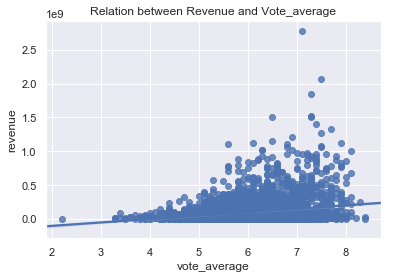

In [356]:
x = df1['vote_average']
y = df1['revenue']
sns.set(color_codes=True)
sns.regplot(x,y).set_title('Relation between Revenue and Vote_average')

>**Note**: A weak uphill (positive) linear relationship between revenue and vote_average.

In [359]:
df1['release_year'].corr(df1['revenue'])

0.139126127606655

Text(0.5, 1.0, 'Relation between Revenue and Release_year')

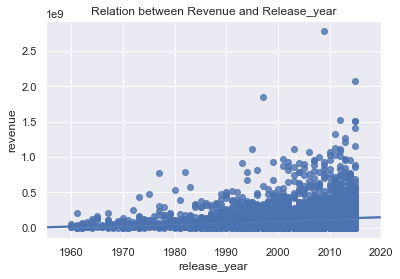

In [357]:
x = df1['release_year']
y = df1['revenue']
sns.set(color_codes=True)
sns.regplot(x,y).set_title('Relation between Revenue and Release_year')

>**Note**: A weak uphill (positive) linear relationship between revenue and release_year.

<a id='conclusions'></a>
## Conclusions


### Research Question 1 (Which genres are most popular from year to year?)

>### The four most popular genres from year to year: 
>##### 1.Adventure|Science Fiction|Thriller
>##### 2.Adventure|Drama|Science Fiction
>##### 3.Science Fiction|Adventure|Thriller 
>##### 4.Action|Thriller|Science Fiction|Mystery|Adventure     

### Research Question 2  ( What kinds of properties are associated with movies that have high revenues?)

>### All the five properties have positive linear relationship with revenue, while vote_count has the strongest linear relationship with it, both popularity and budget have moderate linear relationship with it and both vote_average and release_year only have very weak linear relationship with it.  